# Stochastic Gradient Descent 

Stochastic Gradient Descent (SGD) is a popular optimization algorithm widely used in machine learning and deep learning. It is particularly well-suited for large-scale datasets due to its efficiency and ability to handle noisy and non-linear problems. The core idea behind SGD is to iteratively update the model parameters in the direction of steepest descent of the loss function, aiming to minimize the loss and improve the model's performance.

In each iteration of SGD, a random subset of the training data, called a mini-batch, is sampled. The model's predictions on this mini-batch are compared to the corresponding ground truth labels, and the gradients of the loss function with respect to the parameters are computed. The parameters are then updated by taking a step in the opposite direction of the gradients, scaled by a learning rate. This process is repeated for a specified number of epochs or until convergence is achieved.

SGD has several advantages. Firstly, it is memory-efficient since it only requires a small portion of the dataset to compute gradients in each iteration. Secondly, SGD can navigate through complex and high-dimensional parameter spaces, making it suitable for training deep neural networks. Finally, SGD allows for online learning, where the model can adapt to new data as it arrives.

However, SGD also has some limitations. It can sometimes converge to suboptimal solutions due to the inherent noise introduced by randomly sampling mini-batches. To mitigate this, learning rate schedules and regularization techniques can be employed. Additionally, SGD might require careful tuning of hyperparameters such as learning rate and mini-batch size to ensure good convergence and performance.


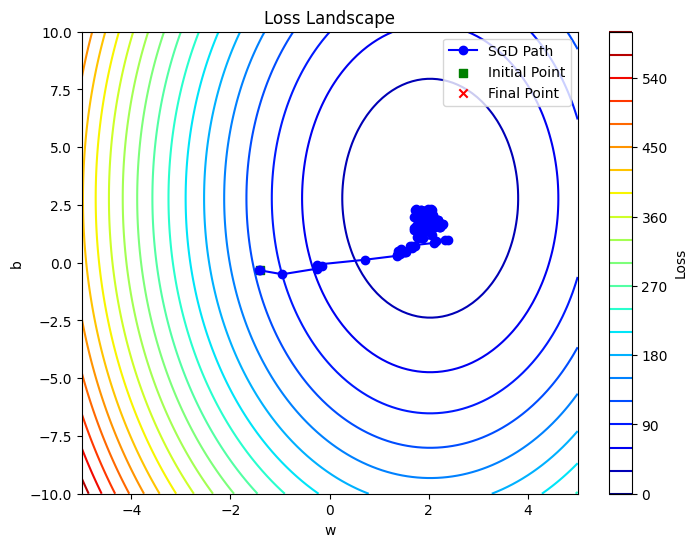

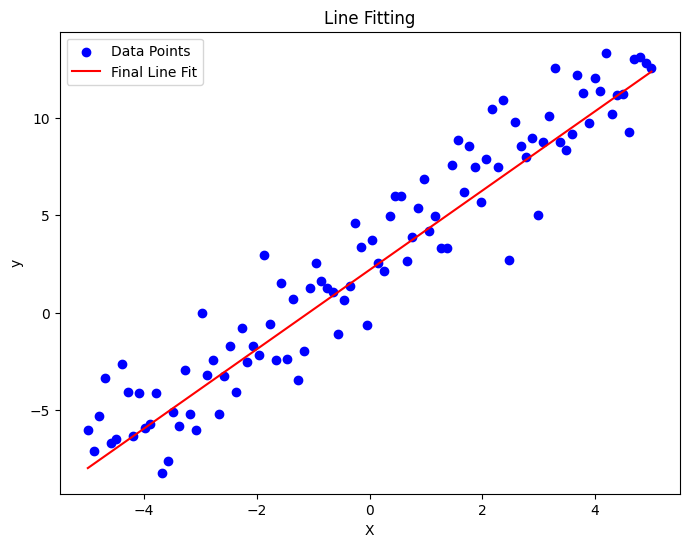

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the dataset
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y = 2 * X + 3 + np.random.normal(0, 2, size=X.shape)

# Define the loss function (mean squared error)
def loss_function(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

# Initialize parameters
learning_rate = 0.01
num_epochs = 10
batch_size = 10

# Initialize weights (slope and intercept)
w = np.random.randn()
b = np.random.randn()

# Create a grid of w and b values for contour plotting
w_vals = np.linspace(-5, 5, 100)
b_vals = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)
Z = np.zeros_like(W)

for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        Z[i, j] = loss_function(X * W[i, j] + B[i, j], y)

# Perform SGD
trajectory = []  # Store the trajectory of parameter updates

for epoch in range(num_epochs):
    for _ in range(batch_size):
        # Select a random sample from the dataset
        idx = np.random.randint(len(X))
        x_sample, y_sample = X[idx], y[idx]
        
        # Compute the predicted y value
        y_pred = w * x_sample + b
        
        # Compute the gradients
        grad_w = 2 * (y_pred - y_sample) * x_sample
        grad_b = 2 * (y_pred - y_sample)
        
        # Update the weights
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
        
        # Store the updated weights
        trajectory.append((w, b))

# Plot the landscape of the loss function
plt.figure(figsize=(8, 6))
plt.contour(W, B, Z, levels=20, cmap='jet')
plt.colorbar(label='Loss')
plt.title('Loss Landscape')
plt.xlabel('w')
plt.ylabel('b')

# Plot the trajectory path
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'b-o', label='SGD Path')
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='green', marker='s', label='Initial Point')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', marker='x', label='Final Point')
plt.legend()

# Plot the dataset and the final line fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, trajectory[-1, 0]*X + trajectory[-1, 1], 'r', label='Final Line Fit')
plt.title('Line Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.show()
